In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [34]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Spotify Dataset EDA

In [35]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [36]:
df.head()

uris                             names artist_names  \
0  3rUGC1vUpkDG9CZFHMur1t                            greedy   Tate McRae   
1  6usohdchdzW9oML7VC4Uhk                      Lose Control  Teddy Swims   
2  31nfdEooLEq7dn3UMcIeB5  Vois sur ton chemin - Techno Mix      BENNETT   
3  5mjYQaktjmjcMKcUIcqz4s                         Strangers  Kenya Grace   
4  0QlOkt8nkZ8zqu8xb2SHU8                          Not Fair   Niklas Dee   

              artist_uris  artist_pop              artist_genres  \
0  45dkTj5sMRSjrmBSBeiHym          82           ['alt z', 'pop']   
1  33qOK5uJ8AR2xuQQAhHump          70                         []   
2  1r43wW70tnGUauQYvY5w48          69                         []   
3  7uMDnSZyUYNBPLhPMNuaM2          77  ['singer-songwriter pop']   
4  1ZPGzmbFTn8GRjqTqnLiFE          70             ['slap house']   

                             albums  track_pop  danceability  energy  keys  \
0                            greedy         99         0.750   0.733     6   
1                      Lose Control         82         0.561   0.604     9   
2  Vois sur ton chemin (Techno Mix)         90         0.634   0.824     2   
3                         Strangers         98         0.628   0.523    11   
4                          Not Fair         59         0.733   0.976     5   

   loudness  modes  speechiness  acousticness  instrumentalness  liveness  \
0    -3.180      0       0.0319        0.2560          0.000000     0.114   
1    -4.409      1       0.0337        0.1990          0.000019     0.104   
2    -3.394      0       0.0470        0.0908          0.071100     0.119   
3    -8.307      0       0.0946        0.7010          0.002740     0.219   
4    -5.305      1       0.0450        0.0294          0.000071     0.250   

   valences   tempos           types                     ids  \
0     0.844  111.018  audio_features  3rUGC1vUpkDG9CZFHMur1t   
1     0.242  159.920  audio_features  6usohdchdzW9oML7VC4Uhk   
2     0.371  137.959  audio_features  31nfdEooLEq7dn3UMcIeB5   
3     0.416  169.982  audio_features  5mjYQaktjmjcMKcUIcqz4s   
4     0.523  144.989  audio_features  0QlOkt8nkZ8zqu8xb2SHU8   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...   
1  https://api.spotify.com/v1/tracks/6usohdchdzW9...   
2  https://api.spotify.com/v1/tracks/31nfdEooLEq7...   
3  https://api.spotify.com/v1/tracks/5mjYQaktjmjc...   
4  https://api.spotify.com/v1/tracks/0QlOkt8nkZ8z...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/3rUG...        131872   
1  https://api.spotify.com/v1/audio-analysis/6uso...        210689   
2  https://api.spotify.com/v1/audio-analysis/31nf...        178156   
3  https://api.spotify.com/v1/audio-analysis/5mjY...        172965   
4  https://api.spotify.com/v1/audio-analysis/0QlO...        163034   

   time_signatures playlist_name  
0                1   Top Hits NL  
1                3   Top Hits NL  
2                4   Top Hits NL  
3                4   Top Hits NL  
4                4   Top Hits NL

In [37]:
df.shape

(9228, 26)

In [38]:
df.columns

Index(['uris', 'names', 'artist_names', 'artist_uris', 'artist_pop',
       'artist_genres', 'albums', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'types', 'ids',
       'track_hrefs', 'analysis_urls', 'durations_ms', 'time_signatures',
       'playlist_name'],
      dtype='object')

## Remove Uneccessary Columns

In [39]:
def select_columns(df):
    df =  df[['uris', 'artist_pop',
       'artist_genres', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms', 'time_signatures']]
    return df
    
df = select_columns(df)

In [40]:
df.head()

uris  artist_pop              artist_genres  track_pop  \
0  3rUGC1vUpkDG9CZFHMur1t          82           ['alt z', 'pop']         99   
1  6usohdchdzW9oML7VC4Uhk          70                         []         82   
2  31nfdEooLEq7dn3UMcIeB5          69                         []         90   
3  5mjYQaktjmjcMKcUIcqz4s          77  ['singer-songwriter pop']         98   
4  0QlOkt8nkZ8zqu8xb2SHU8          70             ['slap house']         59   

   danceability  energy  keys  loudness  modes  speechiness  acousticness  \
0         0.750   0.733     6    -3.180      0       0.0319        0.2560   
1         0.561   0.604     9    -4.409      1       0.0337        0.1990   
2         0.634   0.824     2    -3.394      0       0.0470        0.0908   
3         0.628   0.523    11    -8.307      0       0.0946        0.7010   
4         0.733   0.976     5    -5.305      1       0.0450        0.0294   

   instrumentalness  liveness  valences   tempos  durations_ms  \
0          0.000000     0.114     0.844  111.018        131872   
1          0.000019     0.104     0.242  159.920        210689   
2          0.071100     0.119     0.371  137.959        178156   
3          0.002740     0.219     0.416  169.982        172965   
4          0.000071     0.250     0.523  144.989        163034   

   time_signatures  
0                1  
1                3  
2                4  
3                4  
4                4

## Basic EDA and Visualizations

In [41]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  9228.000000  9228.000000   9228.000000  9228.000000  9228.000000   
mean     60.978435    62.880906      0.595853     0.577555     5.180104   
std      16.594445    14.680389      0.191497     0.252677     3.578270   
min       4.000000     0.000000      0.056500     0.000062     0.000000   
25%      49.000000    54.000000      0.485000     0.440000     2.000000   
50%      61.000000    64.000000      0.624000     0.623000     5.000000   
75%      73.000000    74.000000      0.737000     0.762000     8.000000   
max     100.000000   100.000000      0.979000     0.997000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  9228.000000  9228.000000  9228.000000   9228.000000       9228.000000   
mean     -9.797621     0.635999     0.090118      0.327230          0.123299   
std       8.045197     0.481175     0.094569      0.323572          0.289245   
min     -50.060000     0.000000     0.022700      0.000002          0.000000   
25%     -10.188250     0.000000     0.036100      0.048975          0.000000   
50%      -7.334000     1.000000     0.048800      0.204000          0.000021   
75%      -5.572750     1.000000     0.096300      0.555000          0.006470   
max       1.508000     1.000000     0.880000      0.996000          0.991000   

          liveness     valences       tempos  durations_ms  time_signatures  
count  9228.000000  9228.000000  9228.000000  9.228000e+03      9228.000000  
mean      0.171306     0.474438   118.575368  2.136859e+05         3.921977  
std       0.137908     0.252641    28.454122  7.406894e+04         0.421826  
min       0.021200     0.000000    31.237000  5.076500e+04         1.000000  
25%       0.095200     0.263000    97.744250  1.691532e+05         4.000000  
50%       0.117000     0.468500   119.520500  2.001135e+05         4.000000  
75%       0.196000     0.671000   135.993000  2.404032e+05         4.000000  
max       0.991000     0.985000   217.969000  1.413307e+06         5.000000

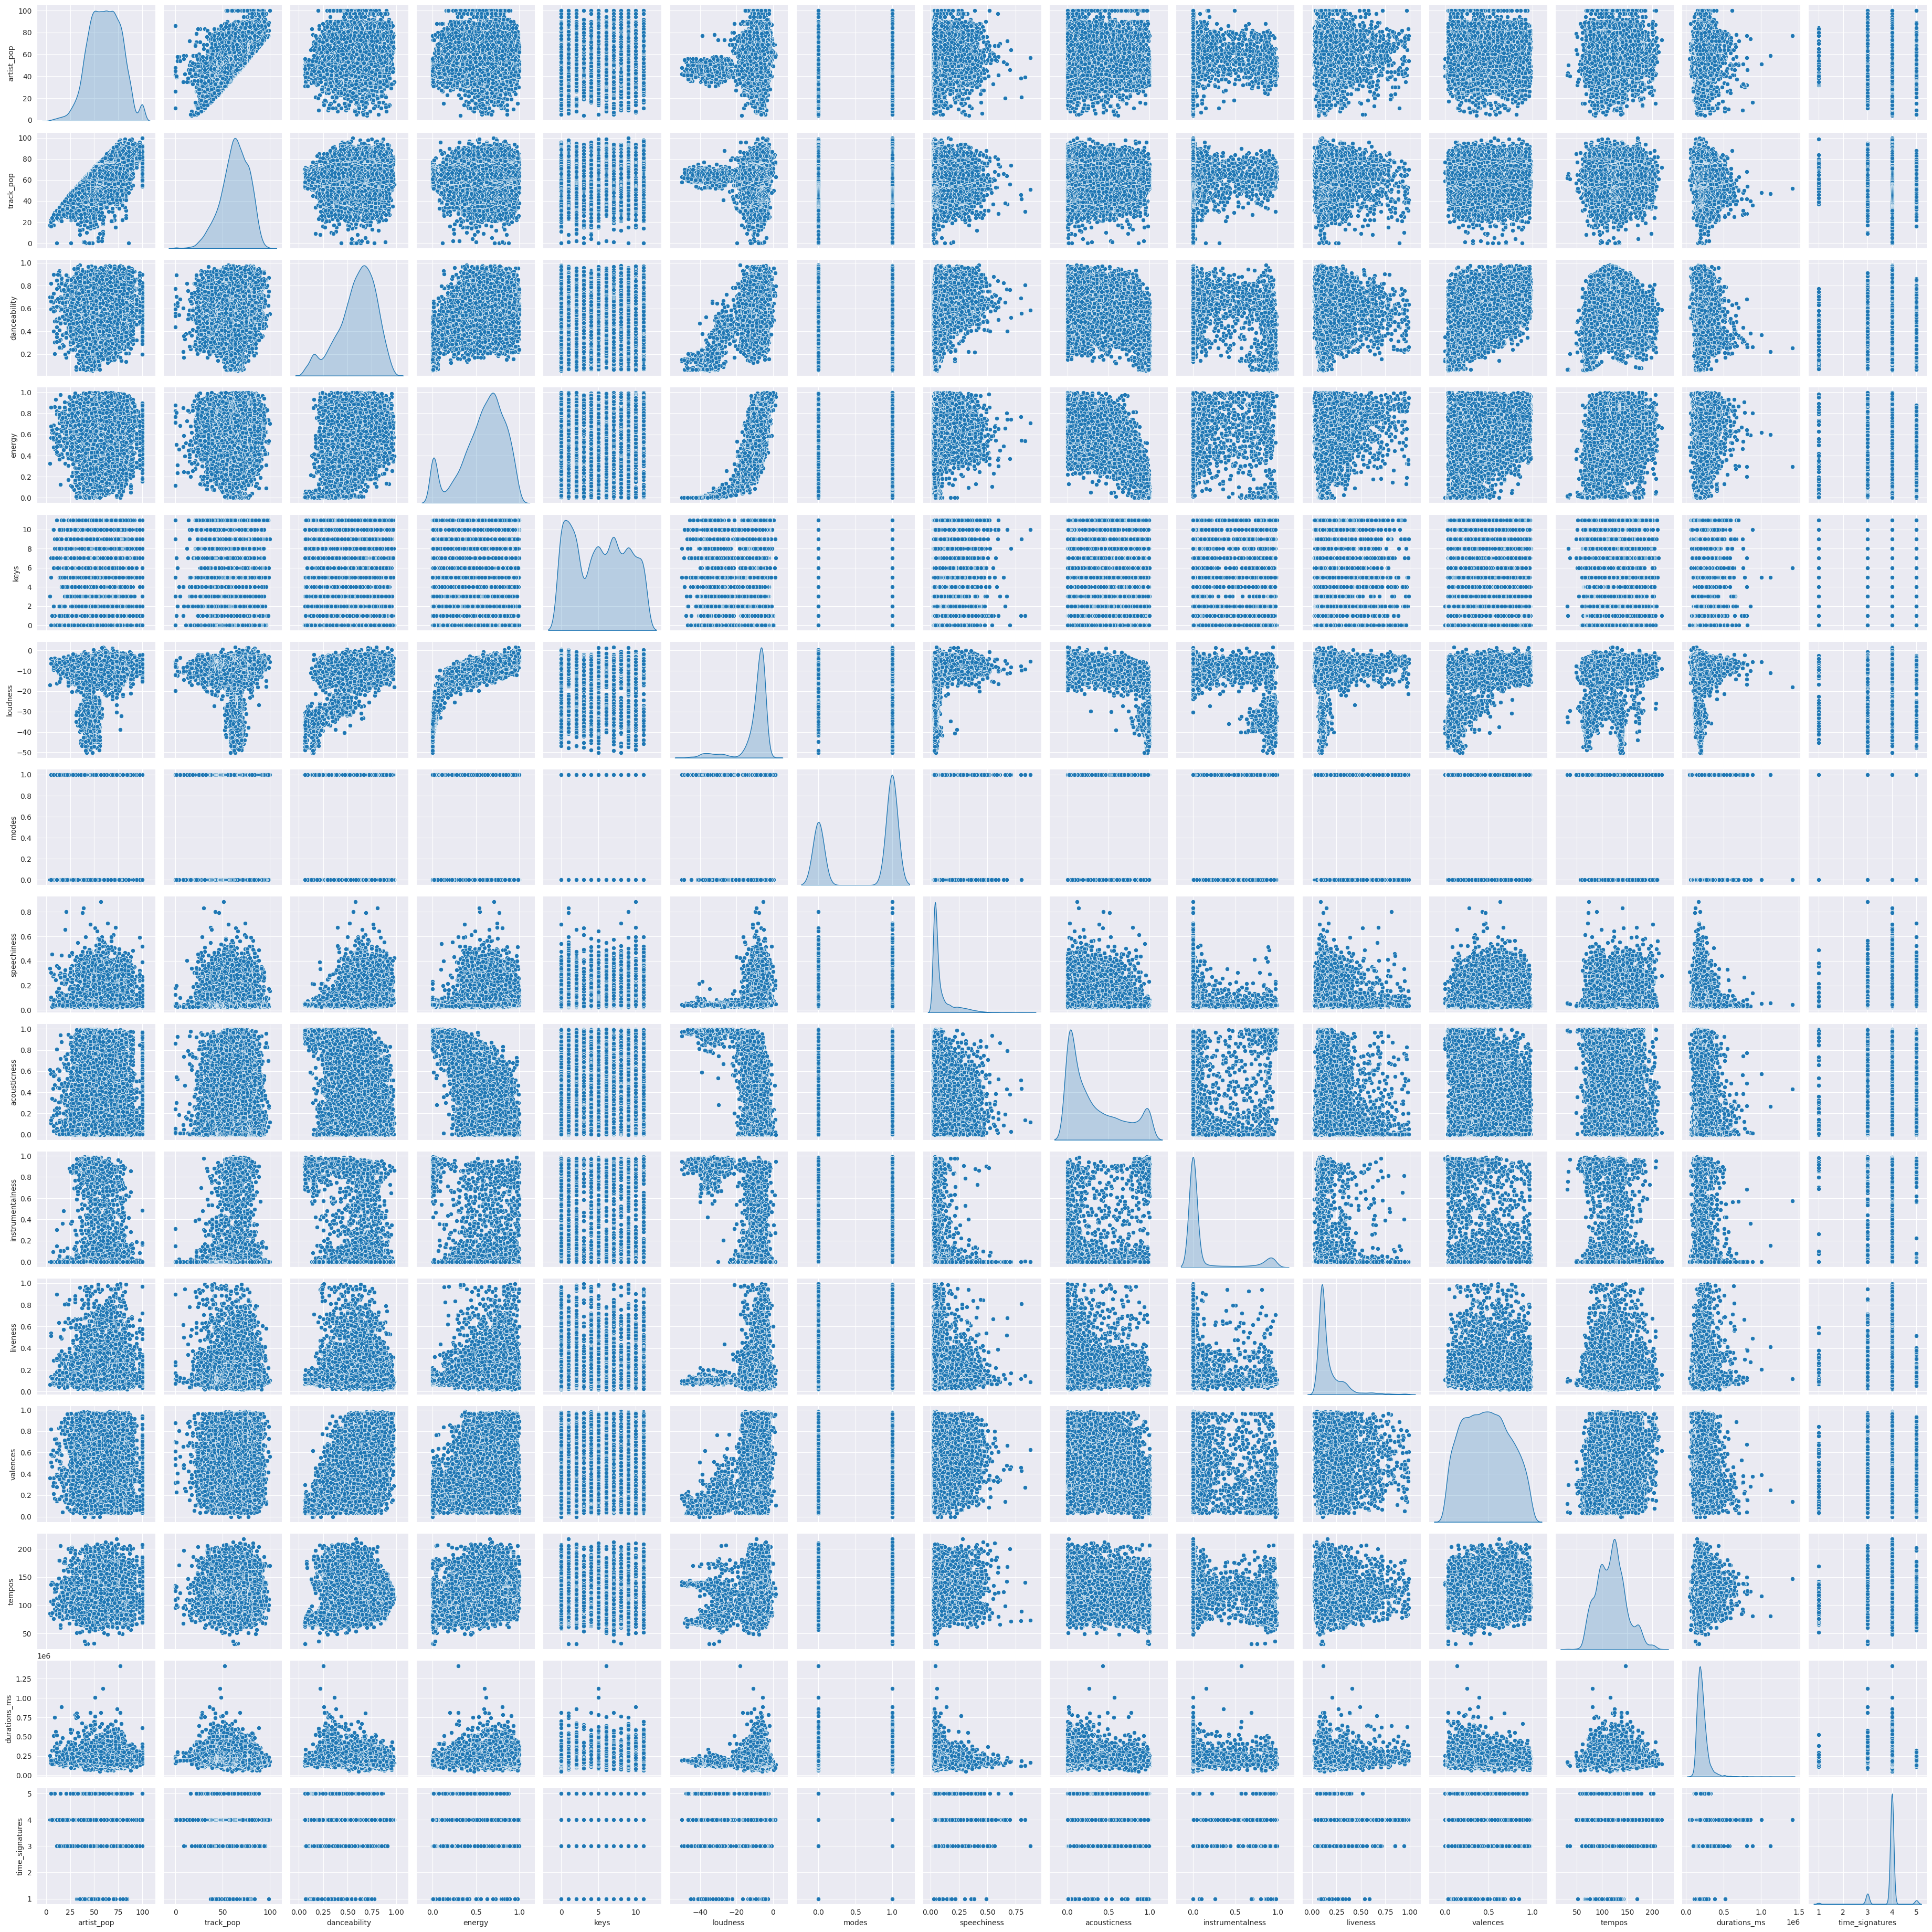

In [42]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Feature Creation

### One Hot Encoding

In [43]:
def ohe_prep(df, column):
    df_encoded = pd.get_dummies(df, columns=[column], dtype=int) 
    return df_encoded

In [44]:
df_test = ohe_prep(df, 'modes')

In [45]:
df_test.columns

Index(['uris', 'artist_pop', 'artist_genres', 'track_pop', 'danceability',
       'energy', 'keys', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms',
       'time_signatures', 'modes_0', 'modes_1'],
      dtype='object')

In [46]:
df_test['modes_0']

0       1
1       0
2       1
3       1
4       0
       ..
9223    0
9224    1
9225    1
9226    1
9227    1
Name: modes_0, Length: 9228, dtype: int64

### Normalize Popularity Values

In [47]:
scaler = MinMaxScaler()
df[['artist_pop', 'track_pop']] = scaler.fit_transform(df[['artist_pop', 'track_pop']])

### TFID Transformation

In [48]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
tfidf_matrix = tf.fit_transform(df['artist_genres'])

In [49]:
len(tf.vocabulary_)

757

In [50]:
tfidf_matrix.shape

(9228, 757)

In [51]:
genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())

In [52]:
genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

In [53]:
genre_df.head()

genre|528hz  genre|abstract  genre|acid  genre|acoustic  genre|adult  \
0          0.0             0.0         0.0             0.0          0.0   
1          0.0             0.0         0.0             0.0          0.0   
2          0.0             0.0         0.0             0.0          0.0   
3          0.0             0.0         0.0             0.0          0.0   
4          0.0             0.0         0.0             0.0          0.0   

   genre|advocacy  genre|aesthetic  genre|african  genre|afro  genre|afrobeat  \
0             0.0              0.0            0.0         0.0             0.0   
1             0.0              0.0            0.0         0.0             0.0   
2             0.0              0.0            0.0         0.0             0.0   
3             0.0              0.0            0.0         0.0             0.0   
4             0.0              0.0            0.0         0.0             0.0   

   genre|afrobeats  genre|afrofuturism  genre|afropop  genre|afroswing  \
0              0.0                 0.0            0.0              0.0   
1              0.0                 0.0            0.0              0.0   
2              0.0                 0.0            0.0              0.0   
3              0.0                 0.0            0.0              0.0   
4              0.0                 0.0            0.0              0.0   

   genre|age  genre|aggressive  genre|alabama  genre|alaska  genre|albanian  \
0        0.0               0.0            0.0           0.0             0.0   
1        0.0               0.0            0.0           0.0             0.0   
2        0.0               0.0            0.0           0.0             0.0   
3        0.0               0.0            0.0           0.0             0.0   
4        0.0               0.0            0.0           0.0             0.0   

   genre|alberta  genre|album  genre|albuquerque  genre|algerien  genre|alt  \
0            0.0          0.0                0.0             0.0    0.94764   
1            0.0          0.0                0.0             0.0    0.00000   
2            0.0          0.0                0.0             0.0    0.00000   
3            0.0          0.0                0.0             0.0    0.00000   
4            0.0          0.0                0.0             0.0    0.00000   

   genre|alte  ...  genre|viral  genre|virale  genre|virginia  genre|vocal  \
0         0.0  ...          0.0           0.0             0.0          0.0   
1         0.0  ...          0.0           0.0             0.0          0.0   
2         0.0  ...          0.0           0.0             0.0          0.0   
3         0.0  ...          0.0           0.0             0.0          0.0   
4         0.0  ...          0.0           0.0             0.0          0.0   

   genre|voetbal  genre|volkspop  genre|wa  genre|wave  genre|weirdcore  \
0            0.0             0.0       0.0         0.0              0.0   
1            0.0             0.0       0.0         0.0              0.0   
2            0.0             0.0       0.0         0.0              0.0   
3            0.0             0.0       0.0         0.0              0.0   
4            0.0             0.0       0.0         0.0              0.0   

   genre|welle  genre|welsh  genre|west  genre|westcoast  genre|western  \
0          0.0          0.0         0.0              0.0            0.0   
1          0.0          0.0         0.0              0.0            0.0   
2          0.0          0.0         0.0              0.0            0.0   
3          0.0          0.0         0.0              0.0            0.0   
4          0.0          0.0         0.0              0.0            0.0   

   genre|women  genre|wonky  genre|world  genre|worship  genre|yacht  \
0          0.0          0.0          0.0            0.0          0.0   
1          0.0          0.0          0.0            0.0          0.0   
2          0.0          0.0          0.0            0.0          0.0   
3          

In [54]:
genre_df.describe()

genre|528hz  genre|abstract   genre|acid  genre|acoustic  genre|adult  \
count  9228.000000     9228.000000  9228.000000     9228.000000  9228.000000   
mean      0.000325        0.000062     0.000956        0.000768     0.002889   
std       0.018029        0.005974     0.018796        0.020628     0.033745   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     0.000000   
max       1.000000        0.573846     0.754736        0.748527     0.522579   

       genre|advocacy  genre|aesthetic  genre|african   genre|afro  \
count     9228.000000      9228.000000    9228.000000  9228.000000   
mean         0.000153         0.000203       0.001010     0.003743   
std          0.010409         0.013765       0.026068     0.047717   
min          0.000000         0.000000       0.000000     0.000000   
25%          0.000000         0.000000       0.000000     0.000000   
50%          0.000000         0.000000       0.000000     0.000000   
75%          0.000000         0.000000       0.000000     0.000000   
max          0.707107         0.935041       0.722466     1.000000   

       genre|afrobeat  genre|afrobeats  genre|afrofuturism  genre|afropop  \
count     9228.000000      9228.000000         9228.000000    9228.000000   
mean         0.003208         0.015895            0.001243       0.004822   
std          0.048138         0.092335            0.031836       0.050441   
min          0.000000         0.000000            0.000000       0.000000   
25%          0.000000         0.000000            0.000000       0.000000   
50%          0.000000         0.000000            0.000000       0.000000   
75%          0.000000         0.000000            0.000000       0.000000   
max          0.735898         1.000000            1.000000       0.670258   

       genre|afroswing    genre|age  genre|aggressive  genre|alabama  \
count      9228.000000  9228.000000       9228.000000    9228.000000   
mean          0.001172     0.000466          0.000086       0.000165   
std           0.028940     0.015663          0.005843       0.011421   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       0.000000   
50%           0.000000     0.000000          0.000000       0.000000   
75%           0.000000     0.000000          0.000000       0.000000   
max           1.000000     0.872459          0.396890       0.910312   

       genre|alaska  genre|albanian  genre|alberta  genre|album  \
count   9228.000000     9228.000000    9228.000000  9228.000000   
mean       0.000061        0.000385       0.000078     0.011093   
std        0.005815        0.016819       0.005489     0.056393   
min        0.000000        0.000000       0.000000     0.000000   
25%        0.000000        0.000000       0.000000     0.000000   
50%        0.000000        0.000000       0.000000     0.000000   
75%        0.000000        0.000000       0.000000     0.000000   
max        0.558580        0.974381       0.452972     0.848108   

       genre|albuquerque  genre|algerien    genre|alt   genre|alte  ...  \
count        9228.000000     9228.000000  9228.000000  9228.000000  ...   
mean            0.000075        0.000385     0.006135     0.001794  ...   
std             0.005251        0.015192     0.067779     0.034813  ...   
min             0.000000        0.000000     0.000000     0.000000  ...   
25%             0.000000        0.000000     0.000000     0.000000  ...   
50%             0.000000        0.000000     0.000000     0.000000  ...   
75%             0.000000        0.000000     0.000000     0.000000  ...   
max             0.434149        0.638773     1.000000     1.000000  ...   

       genre|viral  genre|virale

In [55]:
genre_df.columns

Index(['genre|528hz', 'genre|abstract', 'genre|acid', 'genre|acoustic',
       'genre|adult', 'genre|advocacy', 'genre|aesthetic', 'genre|african',
       'genre|afro', 'genre|afrobeat',
       ...
       'genre|wonky', 'genre|world', 'genre|worship', 'genre|yacht',
       'genre|ye', 'genre|yodeling', 'genre|york', 'genre|zambian',
       'genre|zolo', 'genre|zouglou'],
      dtype='object', length=757)

In [56]:
def tfidf_transformation(df, tf=None):
    if tf is None:
        tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
        tfidf_matrix = tf.fit_transform(df['artist_genres'])
    else:
        tfidf_matrix = tf.transform(df['artist_genres'])
        
    genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())
    genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

    df = df.drop(columns=['artist_genres'])

    df = pd.concat([df.reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)  # Reset index to avoid rows being added due to index in memory
    return df, tf

In [57]:
df, tf = tfidf_transformation(df)

In [58]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  9228.000000  9228.000000   9228.000000  9228.000000  9228.000000   
mean      0.593525     0.628809      0.595853     0.577555     5.180104   
std       0.172859     0.146804      0.191497     0.252677     3.578270   
min       0.000000     0.000000      0.056500     0.000062     0.000000   
25%       0.468750     0.540000      0.485000     0.440000     2.000000   
50%       0.593750     0.640000      0.624000     0.623000     5.000000   
75%       0.718750     0.740000      0.737000     0.762000     8.000000   
max       1.000000     1.000000      0.979000     0.997000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  9228.000000  9228.000000  9228.000000   9228.000000       9228.000000   
mean     -9.797621     0.635999     0.090118      0.327230          0.123299   
std       8.045197     0.481175     0.094569      0.323572          0.289245   
min     -50.060000     0.000000     0.022700      0.000002          0.000000   
25%     -10.188250     0.000000     0.036100      0.048975          0.000000   
50%      -7.334000     1.000000     0.048800      0.204000          0.000021   
75%      -5.572750     1.000000     0.096300      0.555000          0.006470   
max       1.508000     1.000000     0.880000      0.996000          0.991000   

          liveness     valences       tempos  durations_ms  time_signatures  \
count  9228.000000  9228.000000  9228.000000  9.228000e+03      9228.000000   
mean      0.171306     0.474438   118.575368  2.136859e+05         3.921977   
std       0.137908     0.252641    28.454122  7.406894e+04         0.421826   
min       0.021200     0.000000    31.237000  5.076500e+04         1.000000   
25%       0.095200     0.263000    97.744250  1.691532e+05         4.000000   
50%       0.117000     0.468500   119.520500  2.001135e+05         4.000000   
75%       0.196000     0.671000   135.993000  2.404032e+05         4.000000   
max       0.991000     0.985000   217.969000  1.413307e+06         5.000000   

       genre|528hz  genre|abstract   genre|acid  genre|acoustic  genre|adult  \
count  9228.000000     9228.000000  9228.000000     9228.000000  9228.000000   
mean      0.000325        0.000062     0.000956        0.000768     0.002889   
std       0.018029        0.005974     0.018796        0.020628     0.033745   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     0.000000   
max       1.000000        0.573846     0.754736        0.748527     0.522579   

       genre|advocacy  genre|aesthetic  genre|african   genre|afro  \
count     9228.000000      9228.000000    9228.000000  9228.000000   
mean         0.000153         0.000203       0.001010     0.003743   
std          0.010409         0.013765       0.026068     0.047717   
min          0.000000         0.000000       0.000000     0.000000   
25%          0.000000         0.000000       0.000000     0.000000   
50%          0.000000         0.000000       0.000000     0.000000   
75%          0.000000         0.000000       0.000000     0.000000   
max          0.707107         0.935041       0.722466     1.000000   

       genre|afrobeat  ...  genre|viral  genre|virale  genre|virginia  \
count     9228.000000  ...  9228.000000   9228.000000     9228.000000   
mean         0.003208  ...     0.003380      0.000050        0.000052   
std          0.048138  ...     0.048995      0.004819        0.004980   
min          0.000000  ...     0.000000      0.000000        0.000000   
25%          0.000000  ...     0.000000      0.000000        0.000000   
50%          0.000000  ...     0.000000      0.000000        0.000000   
75%          0.000000  ...     0.000

## Pipeline

In [59]:
def data_pipeline(df, tf=None):
    # Select only the necessary columns
    df = select_columns(df)

    # Perfrom OHE
    df = ohe_prep(df, 'modes')
    df = ohe_prep(df, 'keys')
    df = ohe_prep(df, 'time_signatures')

    # Normalize popularity values
    scaler = MinMaxScaler()
    df[['artist_pop', 'track_pop', 'durations_ms']] = scaler.fit_transform(df[['artist_pop', 'track_pop', 'durations_ms']])

    # Perform TFID vectorization on genres
    df, tf = tfidf_transformation(df, tf)
    # df = df.drop(columns=['artist_genres'])

    df = df.set_index(keys='uris', drop=True)

    return df, tf

## Pipeline in Action

In [60]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [61]:
df, tf = data_pipeline(df)

In [62]:
df.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
3rUGC1vUpkDG9CZFHMur1t    0.812500       0.99         0.750   0.733    -3.180   
6usohdchdzW9oML7VC4Uhk    0.687500       0.82         0.561   0.604    -4.409   
31nfdEooLEq7dn3UMcIeB5    0.677083       0.90         0.634   0.824    -3.394   
5mjYQaktjmjcMKcUIcqz4s    0.760417       0.98         0.628   0.523    -8.307   
0QlOkt8nkZ8zqu8xb2SHU8    0.687500       0.59         0.733   0.976    -5.305   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
3rUGC1vUpkDG9CZFHMur1t       0.0319        0.2560          0.000000     0.114   
6usohdchdzW9oML7VC4Uhk       0.0337        0.1990          0.000019     0.104   
31nfdEooLEq7dn3UMcIeB5       0.0470        0.0908          0.071100     0.119   
5mjYQaktjmjcMKcUIcqz4s       0.0946        0.7010          0.002740     0.219   
0QlOkt8nkZ8zqu8xb2SHU8       0.0450        0.0294          0.000071     0.250   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
3rUGC1vUpkDG9CZFHMur1t     0.844  111.018      0.059526        1        0   
6usohdchdzW9oML7VC4Uhk     0.242  159.920      0.117372        0        1   
31nfdEooLEq7dn3UMcIeB5     0.371  137.959      0.093495        1        0   
5mjYQaktjmjcMKcUIcqz4s     0.416  169.982      0.089685        1        0   
0QlOkt8nkZ8zqu8xb2SHU8     0.523  144.989      0.082397        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
3rUGC1vUpkDG9CZFHMur1t       0       0       0       0       0       0   
6usohdchdzW9oML7VC4Uhk       0       0       0       0       0       0   
31nfdEooLEq7dn3UMcIeB5       0       0       1       0       0       0   
5mjYQaktjmjcMKcUIcqz4s       0       0       0       0       0       0   
0QlOkt8nkZ8zqu8xb2SHU8       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
3rUGC1vUpkDG9CZFHMur1t       1       0       0       0        0  ...   
6usohdchdzW9oML7VC4Uhk       0       0       0       1        0  ...   
31nfdEooLEq7dn3UMcIeB5       0       0       0       0        0  ...   
5mjYQaktjmjcMKcUIcqz4s       0       0       0       0        0  ...   
0QlOkt8nkZ8zqu8xb2SHU8       0       0       0       0        0  ...   

                        genre|viral  genre|virale  genre|virginia  \
uris                                                                
3rUGC1vUpkDG9CZFHMur1t          0.0           0.0             0.0   
6usohdchdzW9oML7VC4Uhk          0.0           0.0             0.0   
31nfdEooLEq7dn3UMcIeB5          0.0           0.0             0.0   
5mjYQaktjmjcMKcUIcqz4s          0.0           0.0             0.0   
0QlOkt8nkZ8zqu8xb2SHU8          0.0           0.0             0.0   

                        genre|vocal  genre|voetbal  genre|volkspop  genre|wa  \
uris                                                                           
3rUGC1vUpkDG9CZFHMur1t          0.0            0.0             0.0       0.0   
6usohdchdzW9oML7VC4Uhk          0.0            0.0             0.0       0.0   
31nfdEooLEq7dn3UMcIeB5          0.0            0.0             0.0       0.0   
5mjYQaktjmjcMKcUIcqz4s          0.0            0.0             0.0       0.0   
0QlOkt8nkZ8zqu8xb2SHU8          0.0            0.0             0.0       0.0   

                        genre|wave  genre|weirdcore  genre|welle  genre|welsh  \
uris                                                                            
3rUGC1vUpkDG9CZFHMur1t         0.0              0.0          0.0          0.0   
6usohdchdzW9oML7VC4Uhk         0.0  

In [63]:
df.shape

(9228, 787)

## Create Target Playlist Summary Vector (Depreciated)

If the pipeline processes the dataset and the target playlist separately, there will exist a discrepancy in vector sizes. 
Below is an attempt to use two separate pipeline processes. However, this results in differing vector sizes due to the OHE.
The correct process will be in the following section

In [64]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [65]:
df_target.shape

(34, 26)

Perform simple EDA for visual comparison against all tracks collected

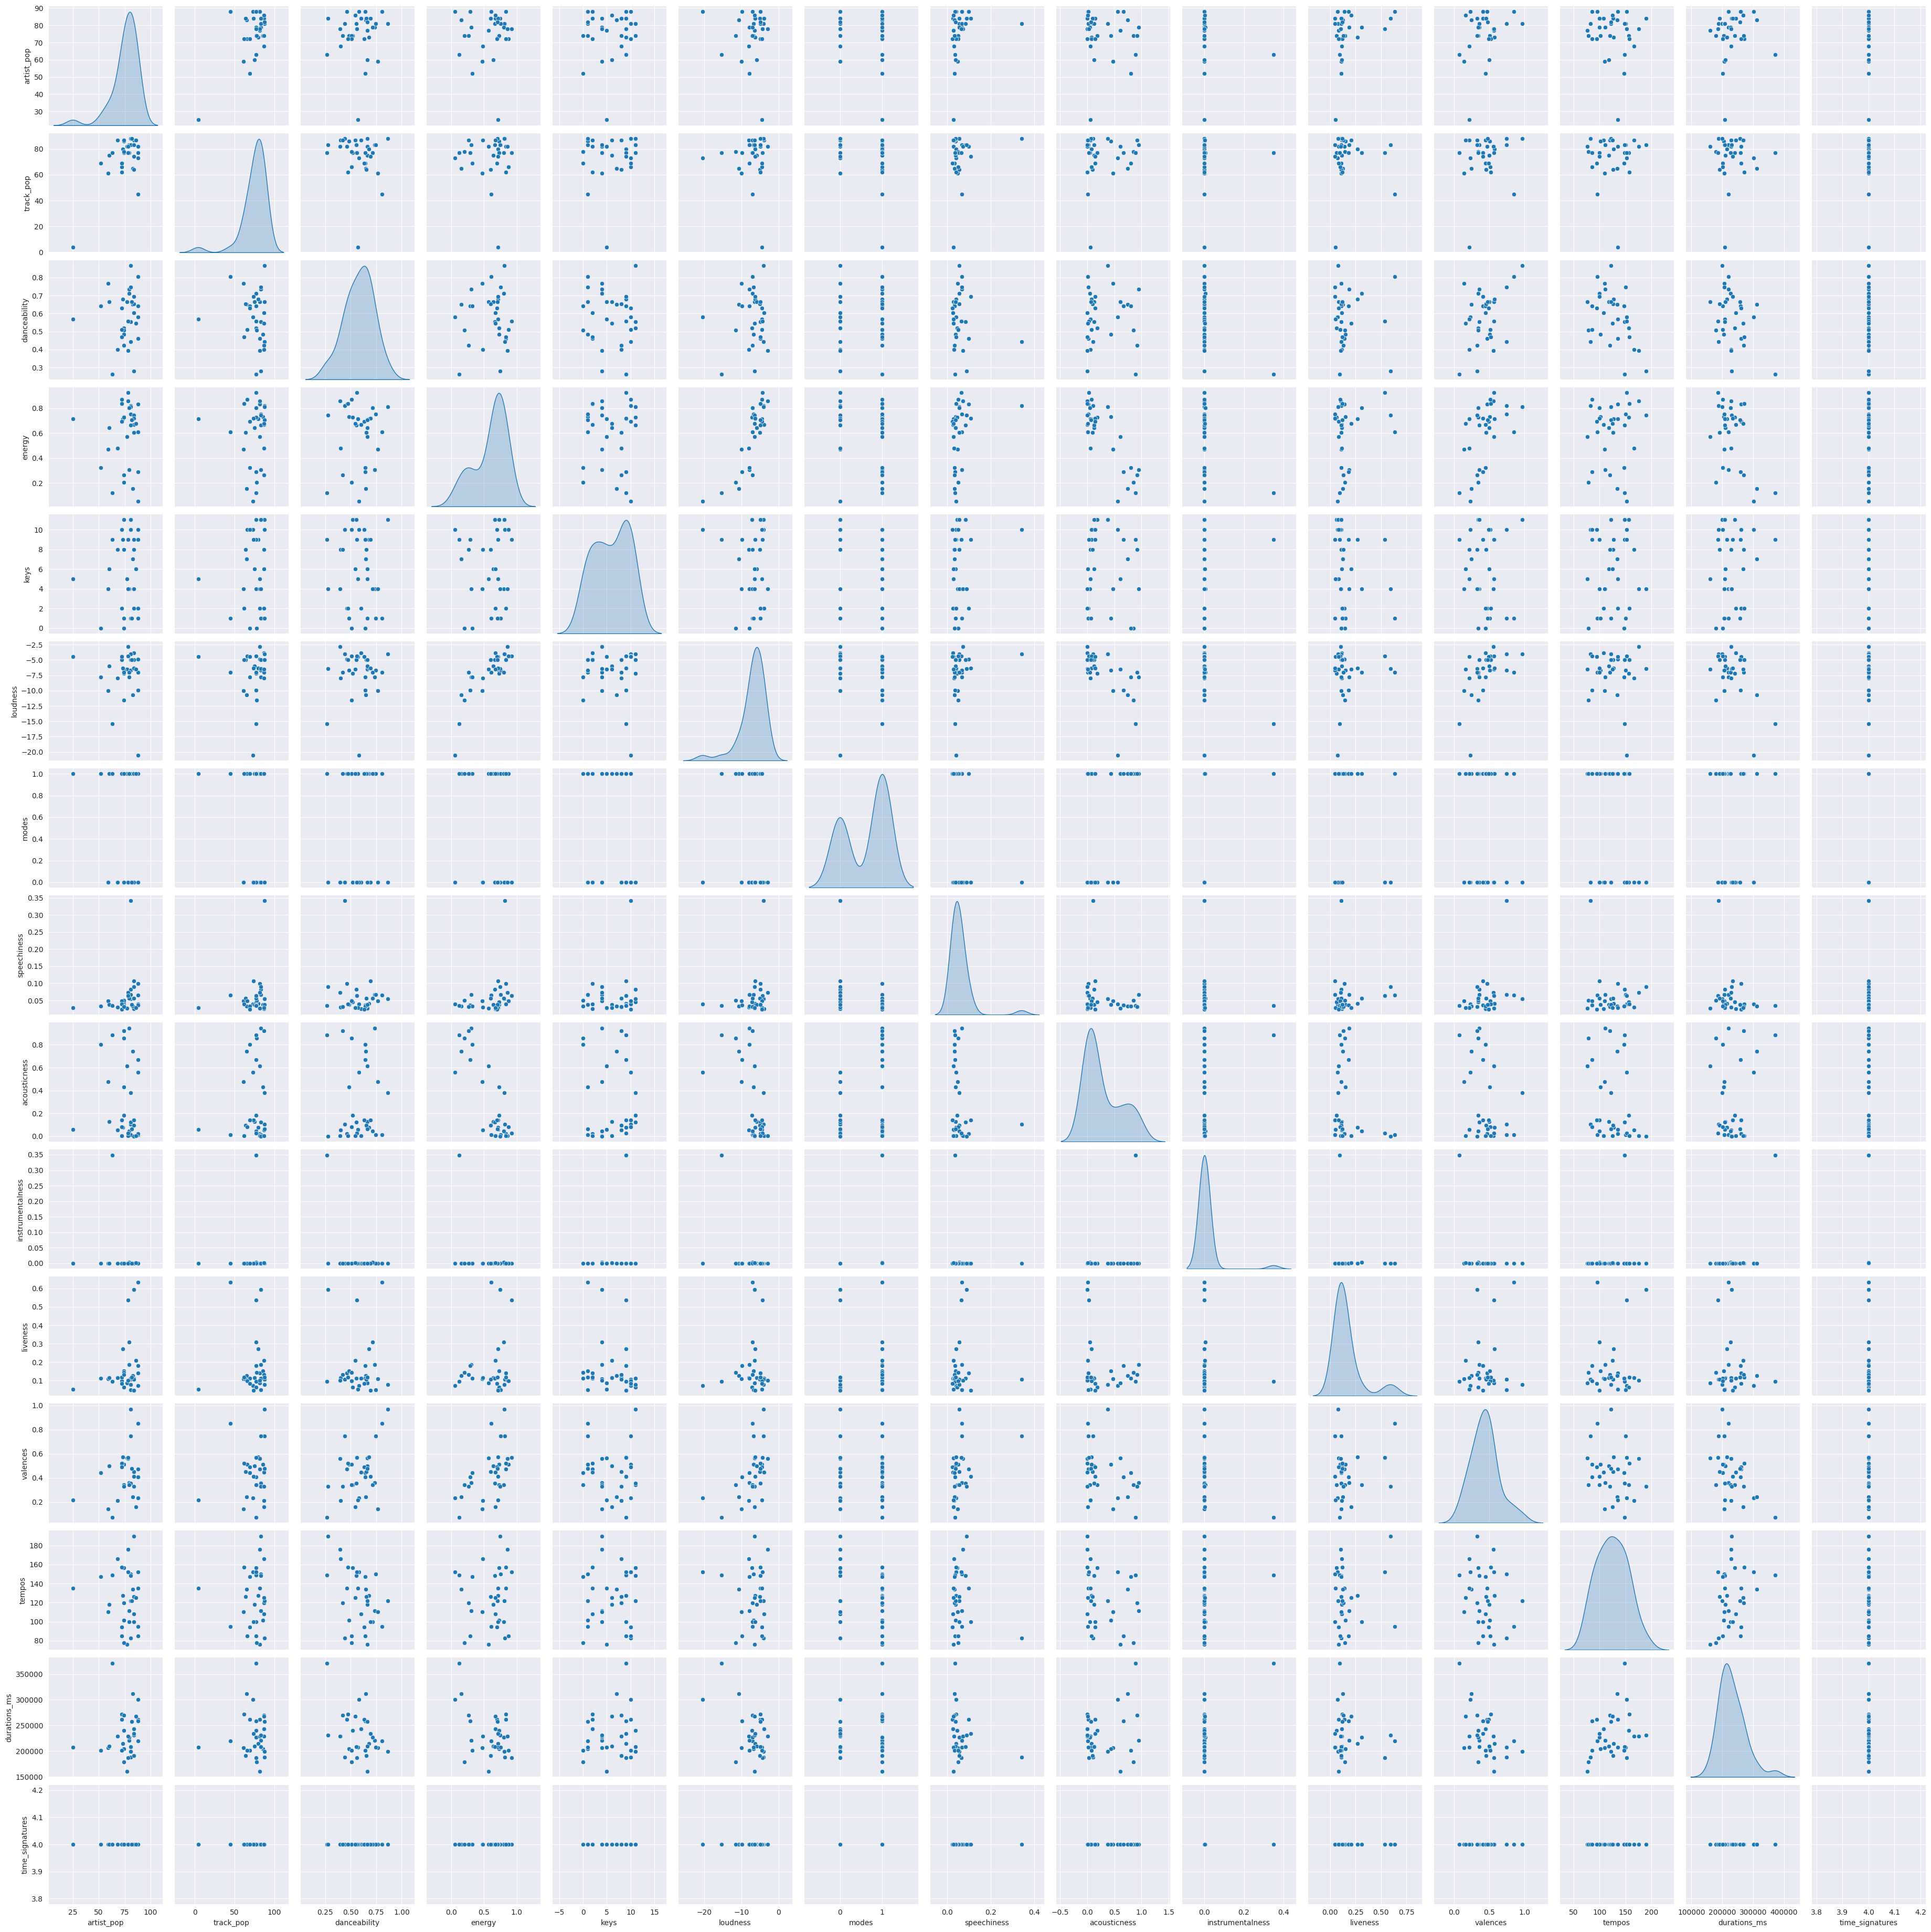

In [66]:
sns.pairplot(df_target, diag_kind='kde')
plt.show()

In [67]:
df_target.describe()

artist_pop  track_pop  danceability     energy       keys   loudness  \
count   34.000000  34.000000     34.000000  34.000000  34.000000  34.000000   
mean    75.470588  74.882353      0.581794   0.598997   5.911765  -7.030559   
std     12.507538  15.902667      0.140948   0.241653   3.646232   3.489547   
min     25.000000   4.000000      0.264000   0.054900   0.000000 -20.514000   
25%     72.250000  70.000000      0.489750   0.473000   2.500000  -7.661000   
50%     78.500000  77.500000      0.592000   0.684500   6.000000  -6.467000   
75%     83.750000  83.000000      0.664000   0.751000   9.000000  -4.889000   
max     88.000000  88.000000      0.866000   0.924000  11.000000  -2.868000   

           modes  speechiness  acousticness  instrumentalness   liveness  \
count  34.000000    34.000000     34.000000         34.000000  34.000000   
mean    0.617647     0.058471      0.284441          0.010449   0.163503   
std     0.493270     0.054306      0.327722          0.059825   0.145838   
min     0.000000     0.024200      0.000185          0.000000   0.046400   
25%     0.000000     0.034075      0.031200          0.000000   0.094875   
50%     1.000000     0.042950      0.115500          0.000000   0.113000   
75%     1.000000     0.065425      0.538250          0.000001   0.149000   
max     1.000000     0.341000      0.946000          0.349000   0.635000   

        valences      tempos   durations_ms  time_signatures  
count  34.000000   34.000000      34.000000             34.0  
mean    0.438544  124.538059  231425.000000              4.0  
std     0.196420   29.422301   42303.823942              0.0  
min     0.073500   76.023000  160097.000000              4.0  
25%     0.334000  100.414250  204751.750000              4.0  
50%     0.445000  123.493000  223615.500000              4.0  
75%     0.519250  148.525500  258096.500000              4.0  
max     0.969000  189.868000  371320.000000              4.0

### Create Target Features

In [68]:
df, tf = data_pipeline(df)
df_target, tf = data_pipeline(df_target, tf)

In [69]:
df_target.shape

(34, 783)

In [70]:
df.shape

(9228, 787)

In [71]:
df_target.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    1.000000   0.488095         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    1.000000   0.928571         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.936508   0.988095         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    1.000000   0.821429         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.825397   0.928571         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.282843        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.478437        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.392367        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.666324        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.000000        0        1   

                        keys_0  keys_1  keys_2  keys_4  keys_5  keys_6  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       1       0   

                        keys_7  keys_8  keys_9  keys_10  keys_11  ...  \
uris                                                              ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0        0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0        0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0        0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0        1        0  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0        0        0  ...   

                        genre|viral  genre|virale  genre|virginia  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha          0.0           0.0             0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0           0.0             0.0   
3di5hcvxxciiqwMH1jarhY          0.0           0.0             0.0   
3B7udSGy2PfgoCniMSb523          0.0           0.0             0.0   
5NORWMFC27ywGSZxi8uquP          0.0           0.0             0.0   

                        genre|vocal  genre|voetbal  genre|volkspop  genre|wa  \
uris                                                                           
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0             0.0       0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0             0.0       0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0             0.0       0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0             0.0       0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0             0.0       0.0   

                        genre|wave  genre|weirdcore  genre|welle  genre|welsh  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha         0.0              0.0          0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT       

In [72]:
dif_1 = set(df_target.columns) - set(df.columns)
print(dif_1)

dif_2 = set(df.columns) - set(df_target.columns)
print(dif_2)

set()
{'keys_3', 'time_signatures_5', 'time_signatures_3', 'time_signatures_1'}


In [73]:
df.columns

Index(['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valences',
       ...
       'genre|wonky', 'genre|world', 'genre|worship', 'genre|yacht',
       'genre|ye', 'genre|yodeling', 'genre|york', 'genre|zambian',
       'genre|zolo', 'genre|zouglou'],
      dtype='object', length=787)

## Create Target Features

In [74]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [75]:
dataset_complete = pd.concat([df_target, df], axis=0)
dataset_complete = dataset_complete.reset_index(drop=True)

In [76]:
dataset_complete.head()

uris                                              names  \
0  5LTzAKRZ2Xct8d6vVrErha                                              Don't   
1  6PCUP3dWmTjcTtXY02oFdT                                 Castle on the Hill   
2  3di5hcvxxciiqwMH1jarhY                               Set Fire to the Rain   
3  3B7udSGy2PfgoCniMSb523  I See Fire - From "The Hobbit - The Desolation...   
4  5NORWMFC27ywGSZxi8uquP                                            Ophelia   

    artist_names             artist_uris  artist_pop  \
0     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
1     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
2          Adele  4dpARuHxo51G3z768sgnrY          84   
3     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
4  The Lumineers  16oZKvXb6WkQlVAjwo2Wbg          77   

                                     artist_genres  \
0       ['pop', 'singer-songwriter pop', 'uk pop']   
1       ['pop', 'singer-songwriter pop', 'uk pop']   
2    ['british soul', 'pop', 'pop soul', 'uk pop']   
3       ['pop', 'singer-songwriter pop', 'uk pop']   
4  ['folk-pop', 'modern rock', 'stomp and holler']   

                                              albums  track_pop  danceability  \
0                                x (Wembley Edition)         45         0.806   
1                                         ÷ (Deluxe)         82         0.461   
2                                                 21         87         0.603   
3  The Hobbit - The Desolation Of Smaug (Original...         73         0.581   
4                                          Cleopatra         82         0.664   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0  0.6080     1    -7.008      1       0.0659       0.01130          0.000000   
1  0.8340     2    -4.868      1       0.0989       0.02320          0.000011   
2  0.6700     2    -3.882      0       0.0249       0.00408          0.000002   
3  0.0549    10   -20.514      0       0.0397       0.55900          0.000000   
4  0.5730     5    -6.519      1       0.0277       0.61300          0.000363   

   liveness  valences   tempos           types                     ids  \
0    0.6350     0.849   95.049  audio_features  5LTzAKRZ2Xct8d6vVrErha   
1    0.1400     0.471  135.007  audio_features  6PCUP3dWmTjcTtXY02oFdT   
2    0.1120     0.446  107.993  audio_features  3di5hcvxxciiqwMH1jarhY   
3    0.0718     0.234  152.037  audio_features  3B7udSGy2PfgoCniMSb523   
4    0.0857     0.566   76.023  audio_features  5NORWMFC27ywGSZxi8uquP   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/5LTzAKRZ2Xct...   
1  https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...   
2  https://api.spotify.com/v1/tracks/3di5hcvxxcii...   
3  https://api.spotify.com/v1/tracks/3B7udSGy2Pfg...   
4  https://api.spotify.com/v1/tracks/5NORWMFC27yw...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/5LTz...        219840   
1  https://api.spotify.com/v1/audio-analysis/6PCU...        261154   
2  https://api.spotify.com/v1/audio-analysis/3di5...        242974   
3  https://api.spotify.com/v1/audio-analysis/3B7u...        300840   
4  https://api.spotify.com/v1/audio-analysis/5NOR...        160097   

   time_signatures             playlist_name  
0                4  Rob Performance Playlist  
1                4  Rob Performance Playlist  
2                4  Rob Performance Playlist  
3                4  Rob Performance Playlist  
4                4  Rob Performance Playlist

In [77]:
dataset_complete.shape

(9262, 26)

In [78]:
duplicates = dataset_complete['uris'].duplicated()
duplicated_rows = dataset_complete[duplicates]
print(len(duplicated_rows))

10


In [79]:
dataset_complete = dataset_complete.drop_duplicates(subset='uris', keep='first')

In [80]:
dataset_complete.shape

(9252, 26)

In [81]:
dataset_complete, _ = data_pipeline(df=dataset_complete)

In [82]:
dataset_complete.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.875000       0.45         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.875000       0.82         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.833333       0.87         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.875000       0.73         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.760417       0.82         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.124088        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.154409        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.141066        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.183536        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.080241        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|viral  genre|virale  genre|virginia  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha          0.0           0.0             0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0           0.0             0.0   
3di5hcvxxciiqwMH1jarhY          0.0           0.0             0.0   
3B7udSGy2PfgoCniMSb523          0.0           0.0             0.0   
5NORWMFC27ywGSZxi8uquP          0.0           0.0             0.0   

                        genre|vocal  genre|voetbal  genre|volkspop  genre|wa  \
uris                                                                           
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0             0.0       0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0             0.0       0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0             0.0       0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0             0.0       0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0             0.0       0.0   

                        genre|wave  genre|weirdcore  genre|welle  genre|welsh  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha         0.0              0.0          0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT         0.0  

In [83]:
dataset_complete.shape

(9252, 787)

## Remove Tracks already in Target

In [84]:
dataset_complete.index

Index(['5LTzAKRZ2Xct8d6vVrErha', '6PCUP3dWmTjcTtXY02oFdT',
       '3di5hcvxxciiqwMH1jarhY', '3B7udSGy2PfgoCniMSb523',
       '5NORWMFC27ywGSZxi8uquP', '5FwlCxV2Q4xjTywLsD3Kxe',
       '4Of7rzpRpV1mWRbhp5rAqG', '3U0UzEdzd45T81FHdPPbfC',
       '7yq4Qj7cqayVTp3FF9CWbm', '6fNhZRFEkBfgW39W3wKARJ',
       ...
       '3L170JRykNjmZ6yT7VqVz0', '0liqgDxxKqACG9kponhjfn',
       '1ZMUZYIlsTnQbOrgbpgalr', '55EM7fFmFL7nWuSauXmNPq',
       '3sfYpzimgCeLiPIshgbIRn', '3NDxc7r19AvChQiVOdUMoK',
       '1B0JPbHveYeKoEfOYep3Ja', '189f0Iy7MlhflRfDi82QP0',
       '5vY3kwXfrDxNu8XzsbMhZi', '68wmnF8Q5rC6EMnBJ9Qp5a'],
      dtype='object', name='uris', length=9252)

In [85]:
def unique_tracks(df, df_target):
    df = df.drop(df_target['uris'], errors='ignore')
    return df 

In [86]:
def extract_target(df, df_target):
    target_uris = df_target['uris'].tolist()
    return df[df.index.isin(target_uris)]

In [87]:
target_features = extract_target(dataset_complete, df_target)

In [88]:
target_features.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.875000       0.45         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.875000       0.82         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.833333       0.87         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.875000       0.73         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.760417       0.82         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.124088        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.154409        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.141066        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.183536        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.080241        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|viral  genre|virale  genre|virginia  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha          0.0           0.0             0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0           0.0             0.0   
3di5hcvxxciiqwMH1jarhY          0.0           0.0             0.0   
3B7udSGy2PfgoCniMSb523          0.0           0.0             0.0   
5NORWMFC27ywGSZxi8uquP          0.0           0.0             0.0   

                        genre|vocal  genre|voetbal  genre|volkspop  genre|wa  \
uris                                                                           
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0             0.0       0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0             0.0       0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0             0.0       0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0             0.0       0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0             0.0       0.0   

                        genre|wave  genre|weirdcore  genre|welle  genre|welsh  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha         0.0              0.0          0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT         0.0  

In [89]:
target_features.shape

(34, 787)

In [90]:
data_features = unique_tracks(dataset_complete, df_target)

In [91]:
data_features.shape

(9218, 787)

The track dataset and the target are now the exact same dimension. 

## Summarize Target Playlist into a single vector

The source I am following sums the values and then performs a cosine similarity measurement to determine similarity. 
However, I think that averaging the playlist features may allow for a better similarity metric/

In [92]:
target_vec_mean = target_features.mean(axis=0)
target_vec_mean = target_vec_mean.to_numpy().reshape(1, -1)

target_vec_sum = target_features.sum(axis=0)
target_vec_sum = target_vec_sum.to_numpy().reshape(1, -1)

In [93]:
target_vec_mean

array([[ 7.44485294e-01,  7.48823529e-01,  5.81794118e-01,
         5.98997059e-01, -7.03055882e+00,  5.84705882e-02,
         2.84441029e-01,  1.04490747e-02,  1.63502941e-01,
         4.38544118e-01,  1.24538059e+02,  1.32590408e-01,
         3.82352941e-01,  6.17647059e-01,  5.88235294e-02,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         1.47058824e-01,  5.88235294e-02,  5.88235294e-02,
         2.94117647e-02,  8.82352941e-02,  1.47058824e-01,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.64721557e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [94]:
target_vec_mean.shape

(1, 787)

In [95]:
target_vec_sum

array([[ 2.53125000e+01,  2.54600000e+01,  1.97810000e+01,
         2.03659000e+01, -2.39039000e+02,  1.98800000e+00,
         9.67099500e+00,  3.55268540e-01,  5.55910000e+00,
         1.49105000e+01,  4.23429400e+03,  4.50807388e+00,
         1.30000000e+01,  2.10000000e+01,  2.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  5.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.40000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.00053295e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

## Similarity

Due to the different methods of target playlist summarization, both cosine similarity and Euclidian distance will be calculated. 

In [96]:
data_matrix = data_features.to_numpy()

Calculate cosine similarity and euclidian distance of vector mean

In [97]:
mean_cos_sim = cosine_similarity(data_matrix, target_vec_mean)
print(mean_cos_sim)

mean_euc_sim = euclidean_distances(data_matrix, target_vec_mean)
print(mean_euc_sim)
print(mean_euc_sim.shape)

[[0.9994163 ]
 [0.99949732]
 [0.99943691]
 ...
 [0.99985384]
 [0.99988342]
 [0.99897817]]
[[14.23519008]
 [35.52725675]
 [13.97987945]
 ...
 [ 2.63674997]
 [ 7.67415754]
 [ 6.89392078]]
(9218, 1)


In [98]:
sum_cos_sim = cosine_similarity(data_matrix, target_vec_sum)
print(sum_cos_sim)

sum_euc_sim = euclidean_distances(data_matrix, target_vec_sum)
print(sum_euc_sim)

[[0.9994163 ]
 [0.99949732]
 [0.99943691]
 ...
 [0.99985384]
 [0.99988342]
 [0.99897817]]
[[4130.55492751]
 [4081.67313753]
 [4103.64536038]
 ...
 [4118.42033512]
 [4109.42972463]
 [4121.05456128]]


## Store rankings

In [99]:
track_uris = data_features.index.tolist()

In [100]:
rec_df = pd.DataFrame.from_dict({'uris': track_uris, 
                                 'mean_cos_sim': mean_cos_sim.T.tolist()[0], 
                                 'mean_euc_sim': mean_euc_sim.T.tolist()[0], 
                                 'sum_cos_sim': sum_cos_sim.T.tolist()[0], 
                                 'sum_euc_sim': sum_euc_sim.T.tolist()[0]})
rec_df = rec_df.set_index('uris')

In [101]:
rec_df.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
3rUGC1vUpkDG9CZFHMur1t      0.999416     14.235190     0.999416  4130.554928
6usohdchdzW9oML7VC4Uhk      0.999497     35.527257     0.999497  4081.673138
31nfdEooLEq7dn3UMcIeB5      0.999437     13.979879     0.999437  4103.645360
5mjYQaktjmjcMKcUIcqz4s      0.999916     45.491761     0.999916  4071.395382
0QlOkt8nkZ8zqu8xb2SHU8      0.999733     20.592314     0.999733  4096.516917

In [102]:
rec_df.describe()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
count   9218.000000   9218.000000  9218.000000  9218.000000
mean       0.994735     24.660393     0.994735  4122.647398
std        0.018541     17.686739     0.018541    28.305943
min        0.704146      1.374816     0.704146  4023.453448
25%        0.999092      9.632251     0.999092  4105.274260
50%        0.999688     21.363909     0.999688  4121.752403
75%        0.999841     35.552382     0.999841  4143.515217
max        0.999962     97.471058     0.999962  4208.663568

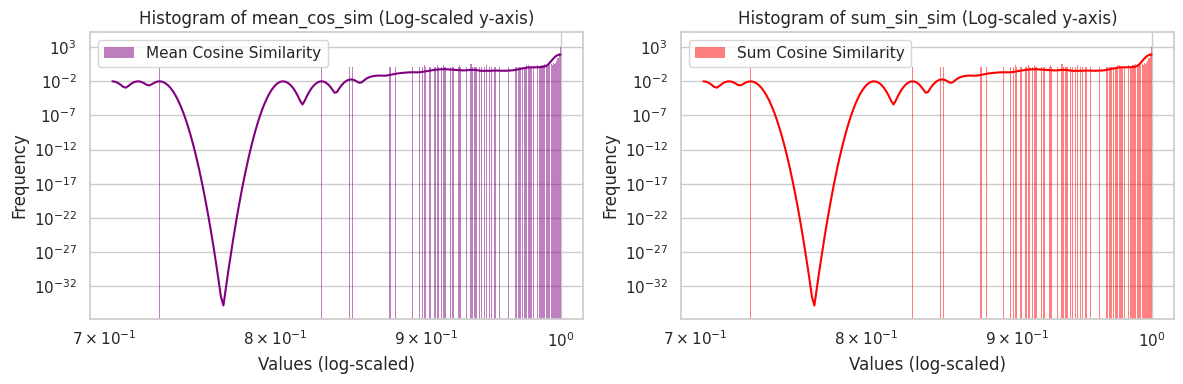

In [103]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_cos_sim', kde=True, color='purple', label='Mean Cosine Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_cos_sim', kde=True, color='red', label='Sum Cosine Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_cos_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_sin_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()

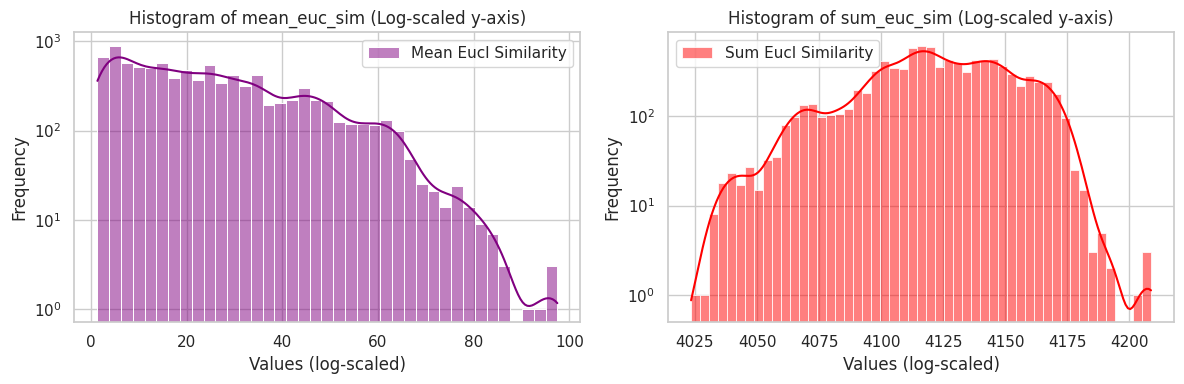

In [104]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_euc_sim', kde=True, color='purple', label='Mean Eucl Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_euc_sim', kde=True, color='red', label='Sum Eucl Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')


axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_euc_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_euc_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()

## Recommendations

In [105]:
df = pd.read_csv('../data/tracks.csv', index_col=0)
df = df.set_index('uris', drop=True)

In [106]:
cosine_sim_df = rec_df.sort_values(by='mean_cos_sim', ascending=False)
euc_sim = rec_df.sort_values(by='mean_euc_sim', ascending=True)

In [107]:
cosine_sim_df.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
3qoftcUZaUOncvIYjFSPdE      0.999962     39.543662     0.999962  4077.315467
1GwMQaZz6Au3QLDbjbMdme      0.999960     39.539221     0.999960  4077.321773
2Eeur20xVqfUoM3Q7EFPFt      0.999958     23.471267     0.999958  4093.401335
2BssmP7ruTX7iZrWLm7EVk      0.999956     26.646836     0.999956  4090.224379
4ABYxlb92WBIjHu7TIKmml      0.999954     23.321137     0.999954  4093.555179

In [108]:
euc_sim.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
3U2imIBWN0BnTS516Lhjfr      0.999940      1.374816     0.999940  4116.745927
2QN9zL3SzXdGqqmXO68gFp      0.999927      1.558645     0.999927  4117.260324
4IQkfUsrwXol38VV3U7t7T      0.999930      1.560787     0.999930  4116.336180
5JCqQhNm1yk64c8mumKn1a      0.999929      1.570169     0.999929  4116.339808
1A3tuE6ti9qoZDwB3LB0t2      0.999919      1.591311     0.999919  4116.958467

### Cosine Similarity Rec Sys

In [113]:
cos_top = cosine_sim_df.head(50)
cos_rec = cos_top.merge(df, left_index=True, right_index=True)
cos_rec.head(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
3qoftcUZaUOncvIYjFSPdE      0.999962     39.543662     0.999962  4077.315467   
1GwMQaZz6Au3QLDbjbMdme      0.999960     39.539221     0.999960  4077.321773   
2Eeur20xVqfUoM3Q7EFPFt      0.999958     23.471267     0.999958  4093.401335   
2BssmP7ruTX7iZrWLm7EVk      0.999956     26.646836     0.999956  4090.224379   
4ABYxlb92WBIjHu7TIKmml      0.999954     23.321137     0.999954  4093.555179   
3NO0uDaqtPzSSU9GAj39hC      0.999954     25.427329     0.999954  4091.446803   
7dW84mWkdWE5a6lFWxJCBG      0.999954     21.455644     0.999954  4095.423700   
4A2LfnduSTsE8u0ecYROxE      0.999954     45.629859     0.999954  4071.233272   
5Nzt7aMMPeIONAu9jhQ3gl      0.999952     41.586569     0.999952  4075.278919   
3yNJkriPzWjkkDAWHIAVUq      0.999951     35.321710     0.999951  4081.547455   
59HjlYCeBsxdI0fcm3zglw      0.999951     15.578348     0.999951  4101.317337   
4d1CG5ei1E2vGbvmgf5KKv      0.999950     19.614351     0.999950  4097.271924   
02VBYrHfVwfEWXk5DXyf0T      0.999950     23.611271     0.999950  4093.268671   
5jQVx40dbpDsstcwlhpk9u      0.999950     36.709159     0.999950  4080.159819   
0CtuA9sDnOAU3NM8bHIMyu      0.999949     28.635304     0.999949  4088.239860   
7861kBrZ5aw7o4NfggcyYW      0.999949      3.626121     0.999949  4113.447038   
3i058E8uxTsYqJ5NWZzqSj      0.999949     17.492938     0.999949  4099.400031   
2RFkLlsHRjcnZA0fHCOTKA      0.999947     18.375144     0.999947  4098.516977   
5pcjystBtalYeqaiXCcgEY      0.999947     18.256541     0.999947  4098.635946   
5dEk2G5Cdklq7eZFCrTIkm      0.999947     11.460586     0.999947  4105.458322   
4AYtqFyFbX0Xkc2wtcygTr      0.999947     83.136417     0.999947  4033.724795   
7bbDRMb1AIjb8cWztwm8MS      0.999947     40.514616     0.999947  4076.354558   
1Ov37jtRQ2YNAe8HzfczkL      0.999947     15.581712     0.999947  4101.318555   
70VDwHuba0z6HMHG6UifIG      0.999947     15.645600     0.999947  4101.254655   
6HIQWdDMDI98njEeOylwkS      0.999947     15.529834     0.999947  4101.371070   
5CscrLqFBgPfZR8fGtikov      0.999947      8.806494     0.999947  4108.135398   
2op0vmqKkXgGXyEgVfrDfu      0.999946     21.662061     0.999946  4095.224583   
5p4ptftepB0MJk6VmNflL3      0.999946     11.414749     0.999946  4105.506161   
2apRbQlpckuUM282gW1Z6p      0.999946     15.572642     0.999946  4101.329153   
47ohYW8e7dxCYn9qbUMBCI      0.999946      2.469204     0.999946  4114.746477   

                                                                    names  \
uris                                                                        
3qoftcUZaUOncvIYjFSPdE                                          Bejeweled   
1GwMQaZz6Au3QLDbjbMdme                              Call It What You Want   
2Eeur20xVqfUoM3Q7EFPFt                    the last great american dynasty   
2BssmP7ruTX7iZrWLm7EVk                                        WILDES DING   
4ABYxlb92WBIjHu7TIKmml  Castles Crumbling (feat. Hayley Williams) (Tay...   
3NO0uDaqtPzSSU9GAj39hC                         Sleepless (feat. GoldFord)   
7dW84mWkdWE5a6lFWxJCBG                               ‘tis the damn season   
4A2LfnduSTsE8u0ecYROxE                                    You Are In Love   
5Nzt7aMMPeIONAu9jhQ3gl                                       Tief im Wald   
3yNJkriPzWjkkDAWHIAVUq                            Ours (Taylor’s Version)   
59HjlYCeBsxdI0fcm3zglw                                     Wildest Dreams   
4d1CG5ei1E2vGbvmgf5KKv                       This Love (Taylor’s Version)   
02VBYrHfVwfEWXk5DXyf0T                                Leave The Door Open   
5jQVx40dbpDsstcwlhpk9u                                       trust issues   
0CtuA9sDnOAU3NM8bHIMyu                                        Wassup Gway   
7861kBrZ5aw7o4NfggcyYW                       It's Not Right But It's Okay   
3i058E8uxTsYqJ5NWZzqSj                                       Little Freak   


In [114]:
cos_rec.tail(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
4AYtqFyFbX0Xkc2wtcygTr      0.999947     83.136417     0.999947  4033.724795   
7bbDRMb1AIjb8cWztwm8MS      0.999947     40.514616     0.999947  4076.354558   
1Ov37jtRQ2YNAe8HzfczkL      0.999947     15.581712     0.999947  4101.318555   
70VDwHuba0z6HMHG6UifIG      0.999947     15.645600     0.999947  4101.254655   
6HIQWdDMDI98njEeOylwkS      0.999947     15.529834     0.999947  4101.371070   
5CscrLqFBgPfZR8fGtikov      0.999947      8.806494     0.999947  4108.135398   
2op0vmqKkXgGXyEgVfrDfu      0.999946     21.662061     0.999946  4095.224583   
5p4ptftepB0MJk6VmNflL3      0.999946     11.414749     0.999946  4105.506161   
2apRbQlpckuUM282gW1Z6p      0.999946     15.572642     0.999946  4101.329153   
47ohYW8e7dxCYn9qbUMBCI      0.999946      2.469204     0.999946  4114.746477   
2RlgNHKcydI9sayD2Df2xp      0.999946     53.336379     0.999946  4063.529505   
4Im6GRj17qa7NW76OsJh1s      0.999945     35.507439     0.999945  4081.365626   
6zsk6uF3MxfIeHPlubKBvR      0.999945     53.406832     0.999945  4063.459367   
0ZHaZDUAydUirse0ZBHmCb      0.999945     35.571313     0.999945  4081.302087   
7xapw9Oy21WpfEcib2ErSA      0.999945     37.544437     0.999945  4079.327970   
2gjidmxtA1pyj2HYrdOTG1      0.999945     43.577258     0.999945  4073.292340   
7mjSHL2Eb0kAwiKbvNNyD9      0.999945     28.394340     0.999945  4088.484921   
42TMa2hgBNjte4uV7jNCnQ      0.999945     55.787300     0.999945  4061.078755   
5e9TFTbltYBg2xThimr0rU      0.999944     27.116040     0.999944  4089.764803   
63T7DJ1AFDD6Bn8VzG6JE8      0.999944     34.262466     0.999944  4082.612505   
0ZCFBp0el7wDgzvCLqaAWe      0.999944     22.576535     0.999944  4094.310941   
7odHgoLFi3GQ90E9PeraI3      0.999944     57.301354     0.999944  4059.564853   
3YSPr1O42CHL7CgVehufPq      0.999944     16.524578     0.999944  4100.377015   
3nqQXoyQOWXiESFLlDF1hG      0.999944      6.738185     0.999944  4110.241242   
013AWvizllIUEC2FOBzOnh      0.999943     43.648163     0.999943  4073.222235   
2vEIeP2yzMbijx7o27YT39      0.999943     21.431329     0.999943  4095.458877   
2GEuZRsMwllbjBFpdOOBAx      0.999943     33.343134     0.999943  4083.533261   
2UC5XnHA1Wn9FjQmbjNca9      0.999943     42.693385     0.999943  4074.177860   
69QIVIjPMnI1ABLBqh9P1b      0.999943     51.409566     0.999943  4065.458735   
6858xmZthZ7jEe06VyZxbN      0.999943     83.180629     0.999943  4033.683106   

                                                            names  \
uris                                                                
4AYtqFyFbX0Xkc2wtcygTr  Soon You’ll Get Better (feat. The Chicks)   
7bbDRMb1AIjb8cWztwm8MS                                 first time   
1Ov37jtRQ2YNAe8HzfczkL          Wildest Dreams (Taylor's Version)   
70VDwHuba0z6HMHG6UifIG                                    Outside   
6HIQWdDMDI98njEeOylwkS                               Stray Nights   
5CscrLqFBgPfZR8fGtikov                             making the bed   
2op0vmqKkXgGXyEgVfrDfu                                DINNER TIME   
5p4ptftepB0MJk6VmNflL3                                 Holy Water   
2apRbQlpckuUM282gW1Z6p                                   Maneater   
47ohYW8e7dxCYn9qbUMBCI          Christmas (Baby Please Come Home)   
2RlgNHKcydI9sayD2Df2xp                               Mr. Blue Sky   
4Im6GRj17qa7NW76OsJh1s                   I Guess I Just Feel Like   
6zsk6uF3MxfIeHPlubKBvR                            Get Ur Freak On   
0ZHaZDUAydUirse0ZBHmCb                              Burn (Techno)   
7xapw9Oy21WpfEcib2ErSA                                  Mistletoe   
2gjidmxtA1pyj2HYrdOTG1                          I Want You Around   
7mjSHL2Eb0kAwiKbvNNyD9                                 Wild World   
42TMa2hgBNjte4uV7jNCnQ                                     Baller   
5e9TFTbltYBg2xThimr0rU                  The Chain - 2004 Remaster   
63T7DJ1AFDD6Bn

### Euclidian Similarity

In [115]:
euc_top = euc_sim.head(50)
euc_rec = euc_top.merge(df, left_index=True, right_index=True)
euc_rec.head(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
3U2imIBWN0BnTS516Lhjfr      0.999940      1.374816     0.999940  4116.745927   
2QN9zL3SzXdGqqmXO68gFp      0.999927      1.558645     0.999927  4117.260324   
4IQkfUsrwXol38VV3U7t7T      0.999930      1.560787     0.999930  4116.336180   
5JCqQhNm1yk64c8mumKn1a      0.999929      1.570169     0.999929  4116.339808   
1A3tuE6ti9qoZDwB3LB0t2      0.999919      1.591311     0.999919  4116.958467   
3GpbwCm3YxiWDvy29Uo3vP      0.999924      1.602054     0.999924  4116.395028   
4U45aEWtQhrm8A5mxPaFZ7      0.999919      1.632654     0.999919  4116.457523   
0fBm16QCdtqEvrcT3b9H7E      0.999930      1.632807     0.999930  4116.155622   
48Jf12YHPBCAfAzi255Rvr      0.999920      1.647772     0.999920  4116.376057   
06OsS6q8FfbctG1WhbDQDO      0.999918      1.655347     0.999918  4116.430100   
7rF8qrVzCGu9gVHO1Q9RdJ      0.999919      1.657208     0.999919  4116.381619   
5Q4JduIFVtirezPnU9RggG      0.999920      1.679646     0.999920  4117.418124   
1jyIQoMPkCD6Pz1x1pzZs5      0.999919      1.683164     0.999919  4117.413918   
6sxptembJVty4sNtcPMAVz      0.999914      1.683469     0.999914  4116.461049   
1XyAphE6uebTqvrJw174Cp      0.999918      1.686750     0.999918  4117.383311   
5gAwwq5heHnzLpLIIFc4NF      0.999920      1.690787     0.999920  4116.238504   
2zBDKzqa6sdxeI0fC6OWIC      0.999914      1.693978     0.999914  4116.429647   
5ri4zqtWhG07hIuNNDWP76      0.999913      1.695338     0.999913  4116.430128   
5EpTEpmbU57I9FMGR9m9sV      0.999912      1.696503     0.999912  4116.473476   
7MaKuS9KzMCqjtmDsJMF7z      0.999918      1.697815     0.999918  4116.291352   
5OSGdSxtulzlzdPdK2MQJC      0.999915      1.708489     0.999915  4117.372701   
1DFD5Fotzgn6yYXkYsKiGs      0.999912      1.711096     0.999912  4117.304018   
7mFj0LlWtEJaEigguaWqYh      0.999913      1.725496     0.999913  4117.385182   
4nmne9J3YCEdhvjTzwiAgu      0.999905      1.728030     0.999905  4117.010973   
3850dYVgOFIXJh5U4BFEWH      0.999913      1.731408     0.999913  4116.315279   
0DRJILxCmuHsrJpYYqXMed      0.999911      1.735529     0.999911  4117.338868   
6HBRLaSQ7NB8MNlaqzYen1      0.999906      1.740469     0.999906  4116.532916   
0rLMwM9J5DkkucxXByncSZ      0.999916      1.741984     0.999916  4117.503520   
591wGDMg5Bnus2laEIK2Ac      0.999910      1.759072     0.999910  4117.402209   
4EzkcqltSOxYE2lstuLOFs      0.999909      1.759603     0.999909  4116.353184   

                                                                    names  \
uris                                                                        
3U2imIBWN0BnTS516Lhjfr                                       Sunday Smile   
2QN9zL3SzXdGqqmXO68gFp            Somebody's Watching Me - Single Version   
4IQkfUsrwXol38VV3U7t7T  Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...   
5JCqQhNm1yk64c8mumKn1a                                                 22   
1A3tuE6ti9qoZDwB3LB0t2                       I Think I Like When It Rains   
3GpbwCm3YxiWDvy29Uo3vP                                        Right Round   
4U45aEWtQhrm8A5mxPaFZ7                                             Vienna   
0fBm16QCdtqEvrcT3b9H7E                                         Holy Hands   
48Jf12YHPBCAfAzi255Rvr                                           Redlight   
06OsS6q8FfbctG1WhbDQDO                              Dis le moi quand même   
7rF8qrVzCGu9gVHO1Q9RdJ                                               Numb   
5Q4JduIFVtirezPnU9RggG                                             Elohim   
1jyIQoMPkCD6Pz1x1pzZs5                              Love Like We're Dying   
6sxptembJVty4sNtcPMAVz                          Man! I Feel Like A Woman!   
1XyAphE6uebTqvrJw174Cp                                              Freak   
5gAwwq5heHnzLpLIIFc4NF                                      Eenzaam Samen   
2zBDKzqa6sdxeI0fC6OWIC                                           Fly Away   


In [116]:
euc_rec.tail(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
5OSGdSxtulzlzdPdK2MQJC      0.999915      1.708489     0.999915  4117.372701   
1DFD5Fotzgn6yYXkYsKiGs      0.999912      1.711096     0.999912  4117.304018   
7mFj0LlWtEJaEigguaWqYh      0.999913      1.725496     0.999913  4117.385182   
4nmne9J3YCEdhvjTzwiAgu      0.999905      1.728030     0.999905  4117.010973   
3850dYVgOFIXJh5U4BFEWH      0.999913      1.731408     0.999913  4116.315279   
0DRJILxCmuHsrJpYYqXMed      0.999911      1.735529     0.999911  4117.338868   
6HBRLaSQ7NB8MNlaqzYen1      0.999906      1.740469     0.999906  4116.532916   
0rLMwM9J5DkkucxXByncSZ      0.999916      1.741984     0.999916  4117.503520   
591wGDMg5Bnus2laEIK2Ac      0.999910      1.759072     0.999910  4117.402209   
4EzkcqltSOxYE2lstuLOFs      0.999909      1.759603     0.999909  4116.353184   
4IDU19J711XA1ls4M9QWsL      0.999907      1.761874     0.999907  4116.383356   
2DSQvvaojC1yu5phfWDKuB      0.999907      1.765800     0.999907  4117.339297   
4e8h0zqi70JHvZbCzrgcHE      0.999907      1.765850     0.999907  4116.389362   
6ulEymrJ2Azx1uo3YHSE5w      0.999905      1.766888     0.999905  4117.268630   
3ezkfApB6BK9c2QyMqAs2r      0.999901      1.768625     0.999901  4116.672501   
2vUE4rXxQG5ZQQuxIqo4Zm      0.999909      1.770686     0.999909  4117.398801   
70RKbdb0CVDUA9PjefUUIJ      0.999907      1.771060     0.999907  4117.354599   
3YgtkOxZsTuaZdL8McA1FQ      0.999906      1.777872     0.999906  4117.337663   
6aemWEIvOwTMmd9NsMcUVX      0.999907      1.779912     0.999907  4116.339567   
3dl81ypaK6k0y0RCszBKS4      0.999908      1.798590     0.999908  4117.463524   
3Uyt0WO3wOopnUBCe9BaXl      0.999903      1.805779     0.999903  4116.367933   
4jgIzymHtlUCk3DkjWkvFL      0.999901      1.805856     0.999901  4117.287251   
0QprVASPJEbmOhD9P2gcNG      0.999901      1.814930     0.999901  4117.310176   
5OLSGox6JVpAyEQuoSYRcs      0.999901      1.821926     0.999901  4116.359149   
3NDxc7r19AvChQiVOdUMoK      0.999899      1.831485     0.999899  4117.331191   
0XPsOSYzDJZJArevQNm2AR      0.999896      1.833908     0.999896  4116.500122   
4NUmZ5svM1Bbmaz5udqUeJ      0.999896      1.838820     0.999896  4116.469931   
36gFBZrhG5t6ow3NctrGXg      0.999898      1.838853     0.999898  4116.412643   
7FdUvDkaE24o3FPIWTvzv2      0.999894      1.846794     0.999894  4116.519349   
24JrEVHDfohup0ypuOV7os      0.999898      1.848640     0.999898  4116.378112   

                                                    names  \
uris                                                        
5OSGdSxtulzlzdPdK2MQJC                          Esta Vida   
1DFD5Fotzgn6yYXkYsKiGs                Piece Of Your Heart   
7mFj0LlWtEJaEigguaWqYh                       Sweetest Pie   
4nmne9J3YCEdhvjTzwiAgu                  Black Magic Woman   
3850dYVgOFIXJh5U4BFEWH                            Hung Up   
0DRJILxCmuHsrJpYYqXMed                                711   
6HBRLaSQ7NB8MNlaqzYen1         What My World Spins Around   
0rLMwM9J5DkkucxXByncSZ                        Ruggengraat   
591wGDMg5Bnus2laEIK2Ac         Save Me (feat. Kiddo A.I.)   
4EzkcqltSOxYE2lstuLOFs          Pull Up (feat. 21 Savage)   
4IDU19J711XA1ls4M9QWsL                          Datediner   
2DSQvvaojC1yu5phfWDKuB                       How It Feels   
4e8h0zqi70JHvZbCzrgcHE                        Guadalajara   
6ulEymrJ2Azx1uo3YHSE5w                               Bent   
3ezkfApB6BK9c2QyMqAs2r                             Bombay   
2vUE4rXxQG5ZQQuxIqo4Zm                     Beautiful Liar   
70RKbdb0CVDUA9PjefUUIJ  Cool World - Digitally Remastered   
3YgtkOxZsTuaZdL8McA1FQ                            adore u   
6aemWEIvOwTMmd9NsMcUVX                           With You   
3dl81ypaK6k0y0RCszBKS4                            Room 69   
3Uyt0WO3wOopnUBCe9BaXl                       Sur ma route   
4jgIzymHtlUCk3DkjWkvFL                    Going To A Town   